#### Preprocessing Steps

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
import missingno as msno

from pyampute.exploration.mcar_statistical_tests import MCARTest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
os.chdir("/Users/sakshikumar/Documents/UCD/03. WQ 2025/452 ML/Project")

okcupid = pd.read_csv('okcupid_profiles.csv')
okcupid.head()

age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic                NaN   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially        NaN     graduated from masters program   
3  socially        NaN      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  ...  \
0         asian, white  ...   
1                white  ...   
2                  NaN  ...   
3                white  ...   
4  asian, black, other  ...   

                                              essay0  \
0  about me:  i would love to think that i was so...   
1  i am a chef: this is what that means. 1. i am ...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh. ranting about a good salt...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at: http://bagsbrown....   

                                              essay3  \
0  the way i look. i am a six foot half asian, ha...   
1                                                NaN   
2  my large jaw and large glasses are the physica...   
3                  socially awkward but i do my best   
4            i smile a lot and my inquisitive nature   

                                              essay4  \
0  books: absurdistan, the republic, of mice and ...   
1  i am die hard christopher moore fan. i don't r...   
2  okay this is where the cultural matrix gets so...   
3  bataille, celine, beckett. . . lynch, jarmusch...   
4  music: bands, rappers, musicians at the moment...   

                                              essay5  \
0                  food. water. cell phone. shelter.   
1  delicious porkness in all of its glories. my b...   
2  movement conversation creation contemplation t...   
3                                                NaN   
4                                                NaN   

                        essay6  \
0  duality and humorous things   
1                          NaN   
2                          NaN   
3   cats and german philosophy   
4                          NaN   

                                              essay7  \
0  trying to find someone to hang out with. i am ...   
1                                                NaN   
2  viewing. listening. dancing. talking. drinking...   
3                                                NaN   
4                                                NaN   

                                              essay8  \
0  i am new to california and looking for someone...   
1  i am very open and will share just about anyth...   
2  when i was five years old, i was known as "the...   
3                                                NaN   
4                                                NaN   

                                              essay9  
0  you want to be swept off your feet! you are ti...  
1    

In [ ]:
okcupid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [ ]:
okcupid.describe(include='all')

age  status    sex orientation body_type             diet  \
count   59946.000000   59946  59946       59946     54650            35551   
unique           NaN       5      2           3        12               18   
top              NaN  single      m    straight   average  mostly anything   
freq             NaN   55697  35829       51606     14652            16585   
mean       32.340290     NaN    NaN         NaN       NaN              NaN   
std         9.452779     NaN    NaN         NaN       NaN              NaN   
min        18.000000     NaN    NaN         NaN       NaN              NaN   
25%        26.000000     NaN    NaN         NaN       NaN              NaN   
50%        30.000000     NaN    NaN         NaN       NaN              NaN   
75%        37.000000     NaN    NaN         NaN       NaN              NaN   
max       110.000000     NaN    NaN         NaN       NaN              NaN   

          drinks  drugs                          education ethnicity  ...  \
count      56961  45866                              53318     54266  ...   
unique         6      3                                 32       217  ...   
top     socially  never  graduated from college/university     white  ...   
freq       41780  37724                              23959     32831  ...   
mean         NaN    NaN                                NaN       NaN  ...   
std          NaN    NaN                                NaN       NaN  ...   
min          NaN    NaN                                NaN       NaN  ...   
25%          NaN    NaN                                NaN       NaN  ...   
50%          NaN    NaN                                NaN       NaN  ...   
75%          NaN    NaN                                NaN       NaN  ...   
max          NaN    NaN                                NaN       NaN  ...   

        essay0        essay1     essay2    essay3  essay4  essay5     essay6  \
count    54458         52374      50308     48470   49409   49096      46175   
unique   54347         51516      48625     43520   49257   48961      43583   
top          .  enjoying it.  listening  my smile  ask me  family  my future   
freq        12            61         82       529      16       6        161   
mean       NaN           NaN        NaN       NaN     NaN     NaN        NaN   
std        NaN           NaN        NaN       NaN     NaN     NaN        NaN   
min        NaN           NaN        NaN       NaN     NaN     NaN        NaN   
25%        NaN           NaN        NaN       NaN     NaN     NaN        NaN   
50%        NaN           NaN        NaN       NaN     NaN     NaN        NaN   
75%        NaN           NaN        NaN       NaN     NaN     NaN        NaN   
max        NaN           NaN        NaN       NaN     NaN     NaN        NaN   

                  essay7  essay8        essay9  
count              47495   40721         47343  
unique             45548   39323         45440  
top     out with friends  ask me  you want to.  
freq                  89      45           200  
mean                 NaN     NaN           NaN  
std                  NaN     NaN           NaN  
min                  NaN     NaN           NaN  
25%                  NaN     NaN           NaN  
50%                  NaN     NaN           NaN  
75%                  NaN     NaN           NaN  
max                  NaN     NaN           NaN  

[11 rows x 31 columns]

In [ ]:
print(okcupid.columns)
len(okcupid.columns)

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')


31

##### 1. Split features from prompts

In [ ]:
okc_features = okcupid[okcupid.columns[:-10]]       # filtering out prompts
okc_features.head()

age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic                NaN   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially        NaN     graduated from masters program   
3  socially        NaN      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  ...  income                          job  \
0         asian, white  ...      -1               transportation   
1                white  ...   80000         hospitality / travel   
2                  NaN  ...      -1                          NaN   
3                white  ...   20000                      student   
4  asian, black, other  ...      -1  artistic / musical / writer   

        last_online                         location  \
0  2012-06-28-20-30  south san francisco, california   
1  2012-06-29-21-41              oakland, california   
2  2012-06-27-09-10        san francisco, california   
3  2012-06-28-14-22             berkeley, california   
4  2012-06-27-21-26        san francisco, california   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                                     NaN                   has cats   
3                       doesn't want kids                 likes cats   
4                                     NaN  likes dogs and likes cats   

                                   religion  \
0     agnosticism and very serious about it   
1  agnosticism but not too serious about it   
2                                       NaN   
3                                       NaN   
4                                       NaN   

                                 sign     smokes  \
0                              gemini  sometimes   
1                              cancer         no   
2  pisces but it doesn&rsquo;t matter         no   
3                              pisces         no   
4                            aquarius         no   

                                              speaks  
0                                            english  
1  english (fluently), spanish (poorly), french (...  
2                               english, french, c++  
3                           english, german (poorly)  
4                                            english  

[5 rows x 21 columns]

Visualising numerical and categorical features

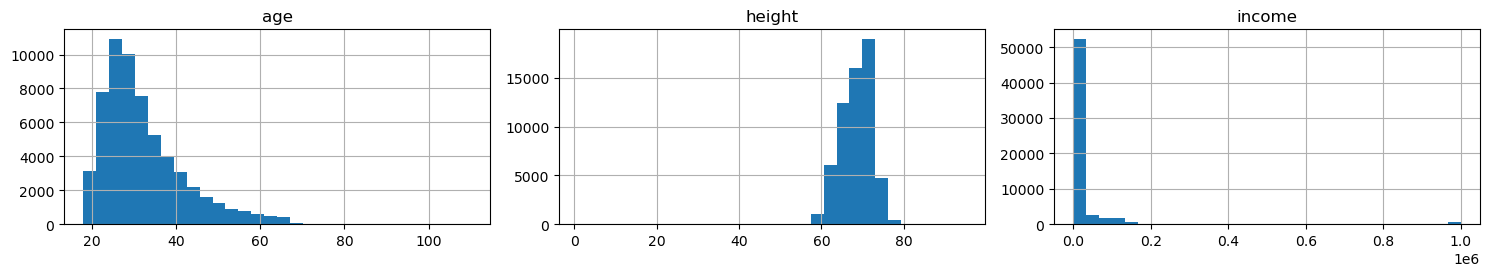

In [ ]:
numeric_cols = okc_features.select_dtypes(include=['number'])
numeric_cols.hist(figsize=(15, 10), bins=30, layout=(4, 3))
plt.tight_layout()
plt.show()

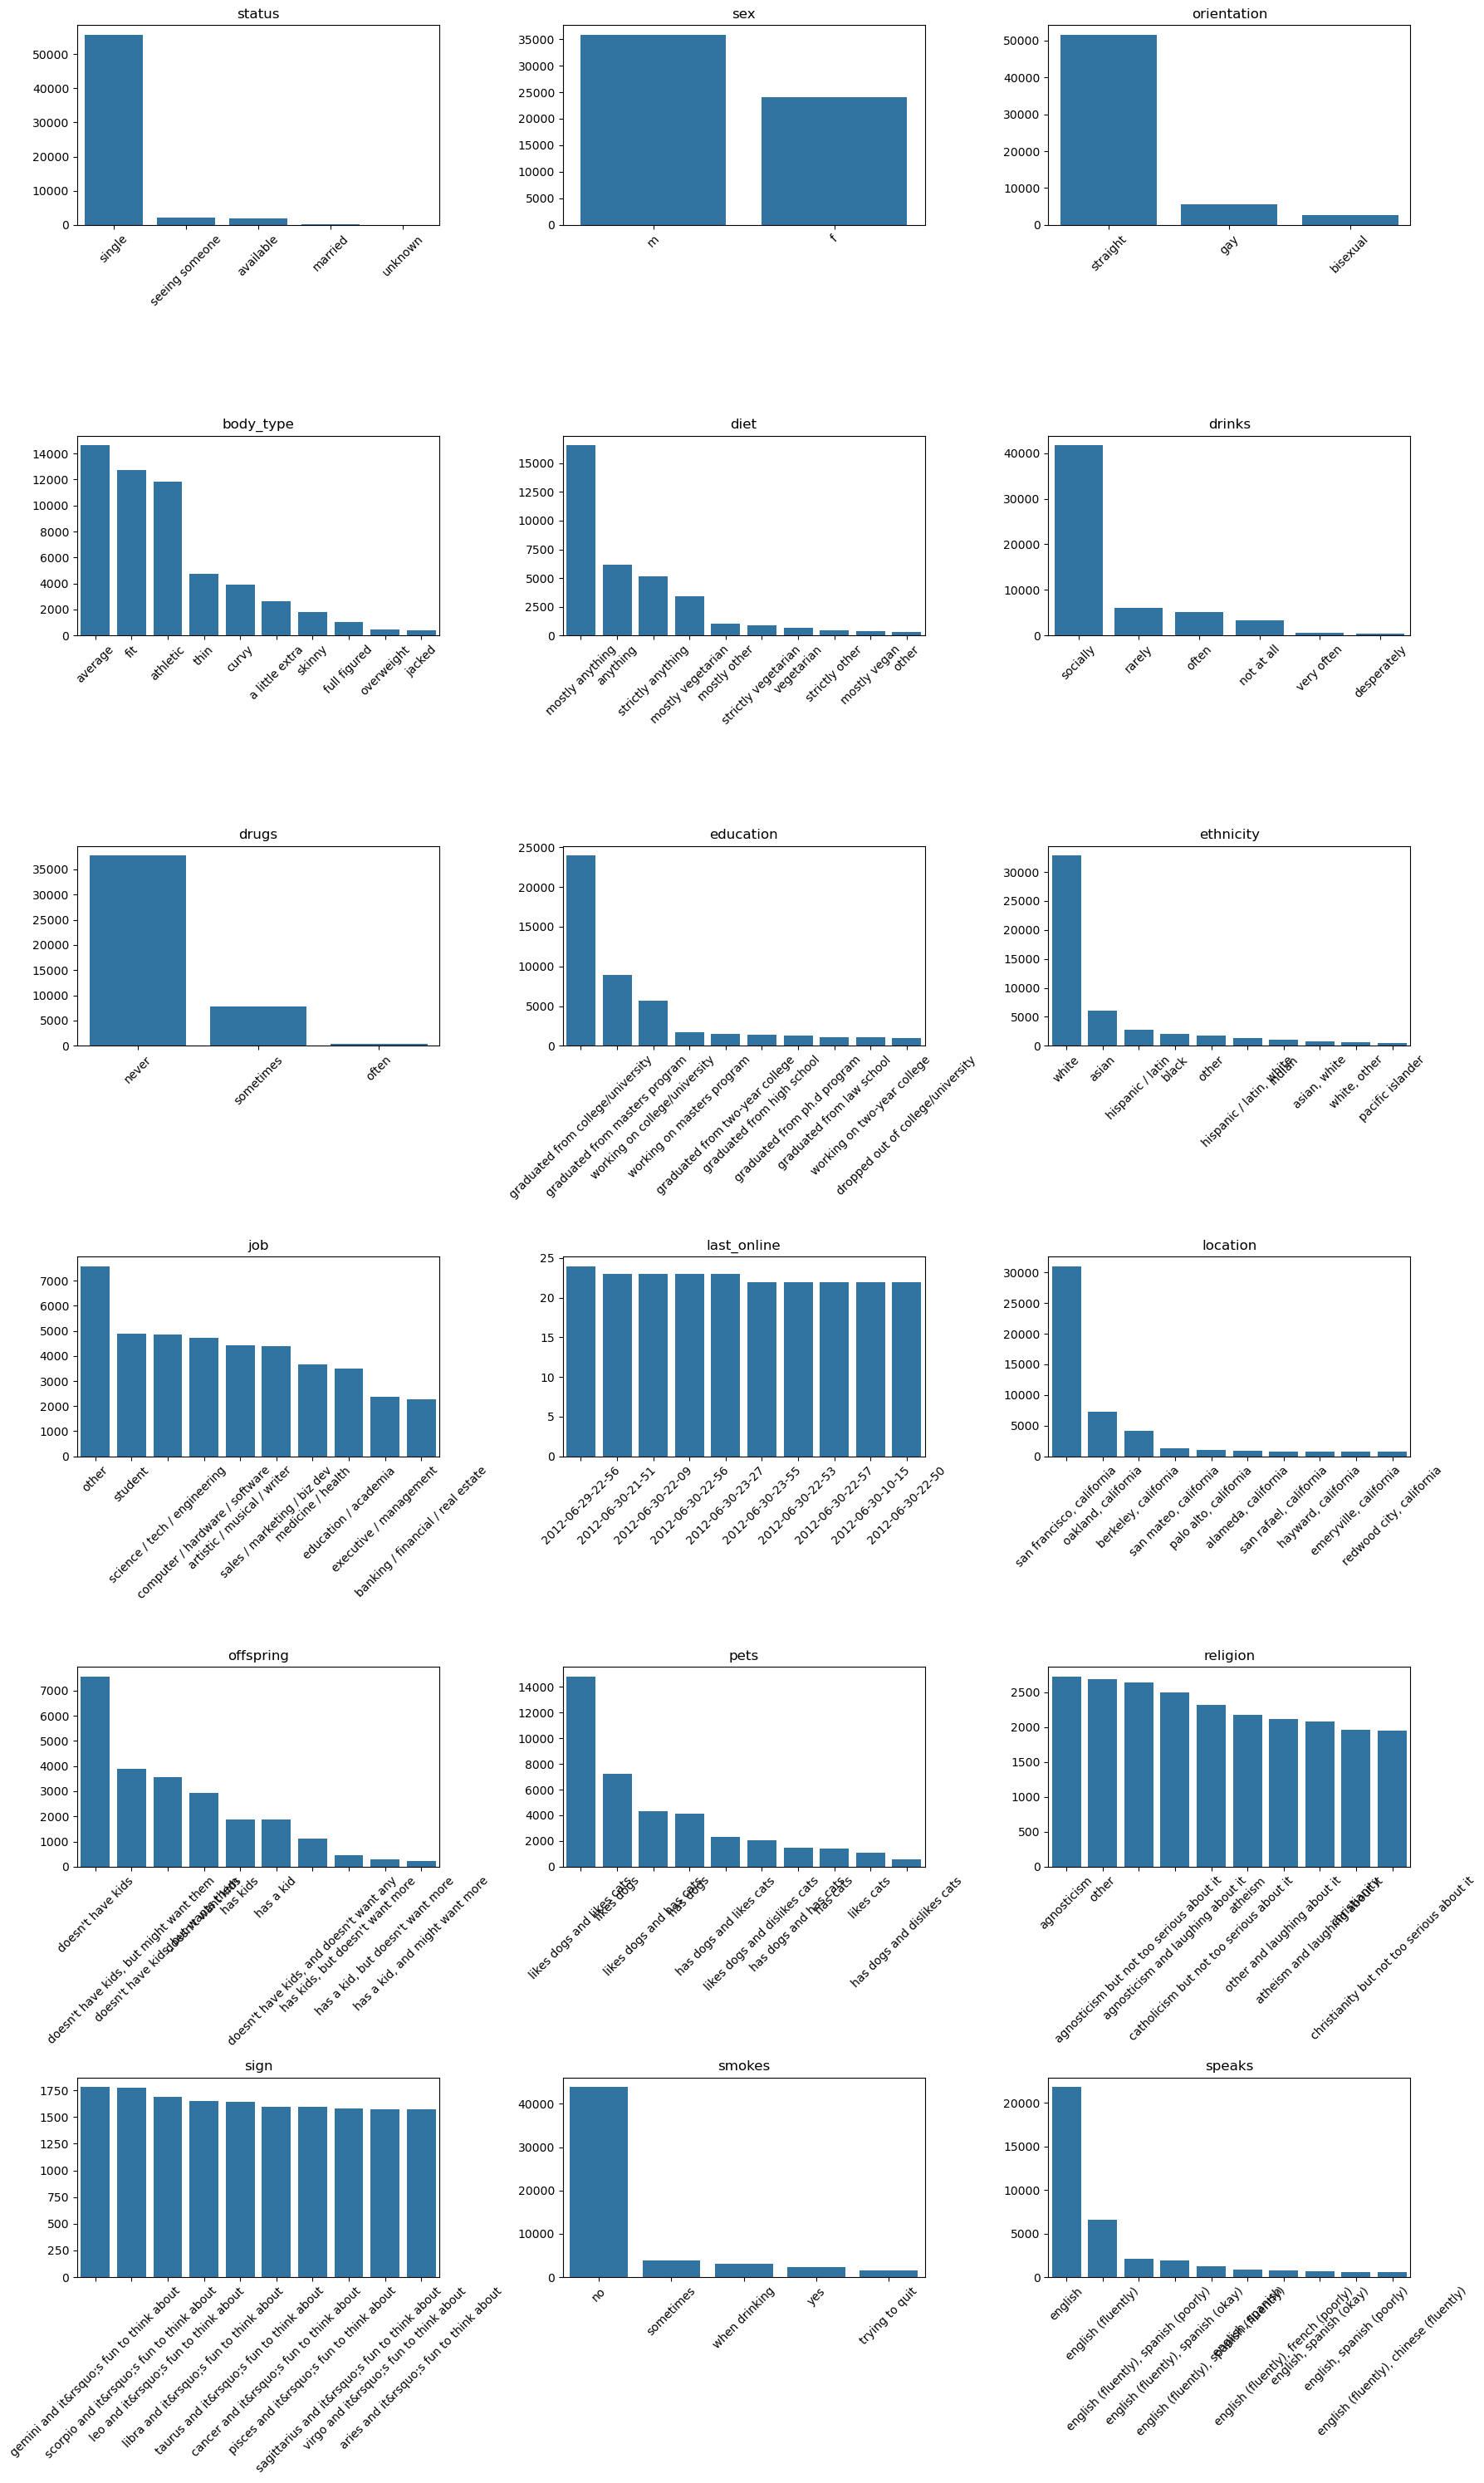

In [ ]:
# Categorical columns only
object_cols = okc_features.select_dtypes(include=['object'])

num_cols = len(object_cols.columns)
rows = math.ceil(num_cols / 3)  # Adjust to have multiple rows
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))  
axes = axes.flatten()

# Plot each column
for i, column in enumerate(object_cols.columns):
    value_counts = object_cols[column].value_counts().head(10)  # Show top 10 categories
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel("")  # Remove x-axis label
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)  # Rotate labels

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### 2. Remove duplicates

In [ ]:
dups = okc_features.drop_duplicates()
dups.shape == okc_features.shape            # No duplicates

True

##### 3. Check for missing values

In [ ]:
print(okc_features.isna().sum().sort_values(ascending=False))

offspring      35561
diet           24395
religion       20226
pets           19921
drugs          14080
sign           11056
job             8198
education       6628
ethnicity       5680
smokes          5512
body_type       5296
drinks          2985
speaks            50
height             3
location           0
last_online        0
income             0
status             0
orientation        0
sex                0
age                0
dtype: int64


In [ ]:
cols = okc_features.columns
isna = []

for x in okc_features.columns:
    isna.append((okc_features[x].isna().sum()/len(okc_features[x])*100).round(0))

isna_df = pd.DataFrame({'Columns': cols, 'Percentage of missing values': isna})
isna_df = isna_df.sort_values(by='Percentage of missing values', ascending=False)
isna_df

Columns  Percentage of missing values
15    offspring                          59.0
5          diet                          41.0
17     religion                          34.0
16         pets                          33.0
7         drugs                          23.0
18         sign                          18.0
12          job                          14.0
8     education                          11.0
19       smokes                           9.0
4     body_type                           9.0
9     ethnicity                           9.0
6        drinks                           5.0
0           age                           0.0
14     location                           0.0
10       height                           0.0
13  last_online                           0.0
11       income                           0.0
1        status                           0.0
3   orientation                           0.0
2           sex                           0.0
20       speaks                           0.0

##### 4. Number of uniques per column

In [ ]:
uniques = []
for i in object_cols.columns:
    uniques.append(object_cols[i].nunique())
uniques

uniques_df = pd.DataFrame({'Columns': object_cols.columns, 'No. of uniques': uniques})
uniques_df = uniques_df.sort_values(by='No. of uniques', ascending=False)
uniques_df

Columns  No. of uniques
10  last_online           30123
17       speaks            7647
8     ethnicity             217
11     location             199
15         sign              48
14     religion              45
7     education              32
9           job              21
4          diet              18
12    offspring              15
13         pets              15
3     body_type              12
5        drinks               6
16       smokes               5
0        status               5
6         drugs               3
2   orientation               3
1           sex               2

##### 5. Correlation of numerical features

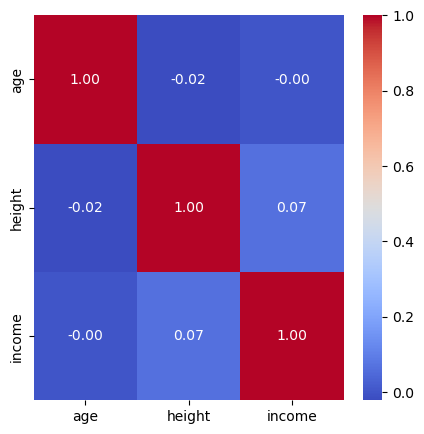

In [ ]:
corr_1 = numeric_cols.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<Axes: xlabel='sex', ylabel='height'>

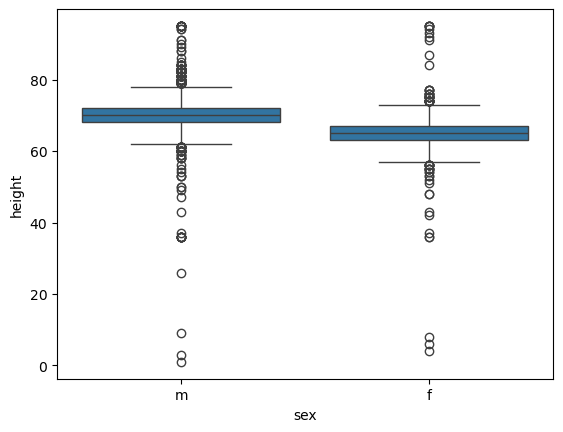

In [ ]:
sns.boxplot(x='sex', y='height', data=okc_features)

##### 6. Aggregating data by groups

In [ ]:
okc_features.groupby('sex')['height'].mean()

sex
f    65.103873
m    70.443492
Name: height, dtype: float64

In [ ]:
okc_features.groupby('status')['age'].mean()

status
available         33.869169
married           36.516129
seeing someone    29.481589
single            32.371223
unknown           35.500000
Name: age, dtype: float64

In [ ]:
okc_features.groupby('status')['income'].mean()

status
available         27859.840751
married           26063.793548
seeing someone    23666.869671
single            19605.809433
unknown            3999.200000
Name: income, dtype: float64

In [ ]:
okc_features.groupby('drugs')['age'].mean()

drugs
never        33.195207
often        26.017073
sometimes    29.863813
Name: age, dtype: float64

In [ ]:
okc_features.groupby('drugs')['smokes'].count()

drugs
never        35412
often          391
sometimes     7314
Name: smokes, dtype: int64

In [ ]:
okc_features.groupby('offspring')['age'].mean().sort_values()

offspring
doesn't have kids, but wants them          30.251613
doesn't have kids                          30.266931
wants kids                                 30.595556
doesn't have kids, but might want them     30.727484
might want kids                            31.774725
has a kid, and wants more                  32.028169
doesn't have kids, and doesn't want any    32.471731
has kids, and wants more                   32.523810
doesn't want kids                          35.317731
has a kid, and might want more             35.571429
has kids, and might want more              38.347826
has a kid                                  42.912281
has kids                                   48.302177
has a kid, but doesn't want more           48.730909
has kids, but doesn't want more            49.864253
Name: age, dtype: float64

In [ ]:
okc_features[okc_features['status']=='single']['orientation'].value_counts()

orientation
straight    48710
gay          5025
bisexual     1962
Name: count, dtype: int64

In [ ]:
okc_features.groupby('sex')['status'].value_counts()

sex  status        
f    single            22319
     seeing someone     1003
     available           656
     married             135
     unknown               4
m    single            33378
     available          1209
     seeing someone     1061
     married             175
     unknown               6
Name: count, dtype: int64

In [ ]:
okc_features.groupby('body_type')['age'].mean().sort_values()

body_type
skinny            27.771525
used up           28.642254
jacked            29.847981
thin              31.598811
rather not say    32.045455
athletic          32.049412
curvy             32.055046
average           32.642097
fit               33.530485
full figured      34.050545
a little extra    34.123621
overweight        34.988739
Name: age, dtype: float64

In [ ]:
okcupid.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

In [ ]:
okcupid.shape

(59946, 31)

##### 7. Removing columns:
- 'location'
- 'last_online'
- 'sign'

##### 8. Label encoding all categorical columns

In [ ]:
okc_feat2 = okc_features.copy()
okc_feat2.nunique().sort_values(ascending=False)

last_online    30123
speaks          7647
ethnicity        217
location         199
height            60
age               54
sign              48
religion          45
education         32
job               21
diet              18
offspring         15
pets              15
income            13
body_type         12
drinks             6
status             5
smokes             5
drugs              3
orientation        3
sex                2
dtype: int64

In [ ]:
## Removing last_online, location and sign as they seem insignificant in a person's consideration of partner traits
# and have high number of unique values.
cols = [x for x in okc_feat2.columns if x not in ['last_online', 'sign', 'location']]
okc_feat2 = okc_feat2[cols]
okc_feat2.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'offspring', 'pets', 'religion', 'smokes', 'speaks'],
      dtype='object')

In [ ]:
# print(okc_features.groupby('education')['income'].mean().sort_values(ascending=False))
okc_feat2['education'] = np.where(okc_feat2['education'].str.contains('dropped out'), 'Dropped out',
                                  np.where(okc_feat2['education'].str.contains('graduated'), 'Graduated',
                                           np.where(okc_feat2['education'].str.contains('working on'), 'In education', okc_feat2['education'])))
okc_feat2.groupby('education')['income'].mean().sort_values(ascending=False)

education
space camp            57240.603448
ph.d program          30768.423077
college/university    21222.636704
masters program       20807.911765
In education          20144.476732
Dropped out           19973.982372
Graduated             19958.045840
two-year college      17611.869369
high school           16978.510417
law school            13157.000000
med school               -1.000000
Name: income, dtype: float64

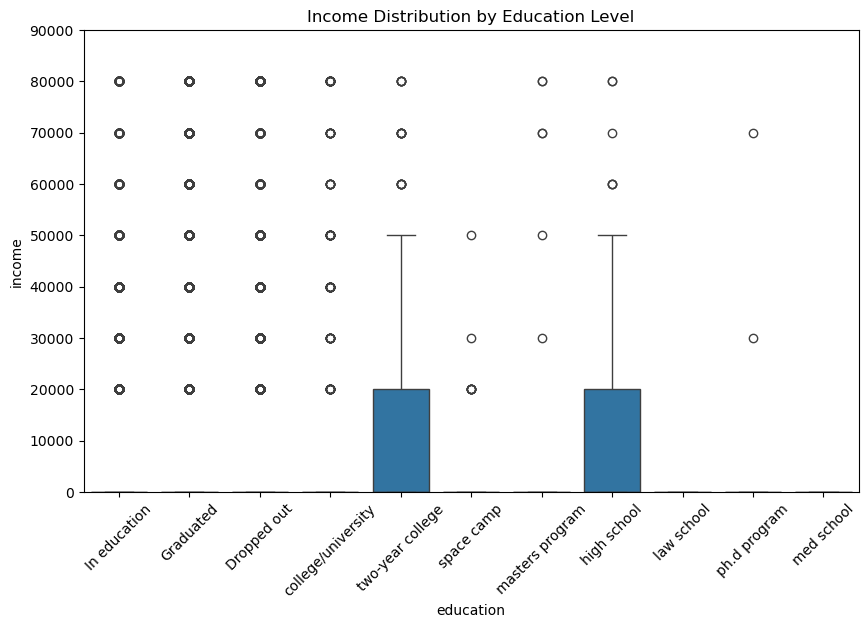

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='education', y='income', data=okc_feat2)

# Define custom y-axis ticks (adjust values based on data distribution)
plt.ylim(0, 90000)

plt.xticks(rotation=45)
plt.title("Income Distribution by Education Level")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in object_cols.columns:
    object_cols[i] = le.fit_transform(object_cols[i])

In [ ]:
object_cols.head()

status  sex  orientation  body_type  diet  drinks  drugs  education  \
0       3    1            2          0    10       4      0         24   
1       3    1            2          2     6       2      2         30   
2       0    1            2         10     0       4      3         12   
3       3    1            2         10    17       4      3         24   
4       3    1            2          1    18       4      0          9   

   ethnicity  job  last_online  location  offspring  pets  religion  sign  \
0         98   19        26756       175          2    14         3    16   
1        215    8        28136       118          2    14         4     8   
2        217   21        24988       155         15     5        45    31   
3        215   18        26402        16          4    10        45    28   
4         22    0        25602       155         15    14        45     0   

   smokes  speaks  
0       1       1  
1       0    4596  
2       0    6334  
3       0    6481  
4       0       1

In [ ]:
og_fmt = pd.concat([numeric_cols, object_cols], axis=1)
og_fmt.head()

age  height  income  status  sex  orientation  body_type  diet  drinks  \
0   22    75.0      -1       3    1            2          0    10       4   
1   35    70.0   80000       3    1            2          2     6       2   
2   38    68.0      -1       0    1            2         10     0       4   
3   23    71.0   20000       3    1            2         10    17       4   
4   29    66.0      -1       3    1            2          1    18       4   

   drugs  ...  ethnicity  job  last_online  location  offspring  pets  \
0      0  ...         98   19        26756       175          2    14   
1      2  ...        215    8        28136       118          2    14   
2      3  ...        217   21        24988       155         15     5   
3      3  ...        215   18        26402        16          4    10   
4      0  ...         22    0        25602       155         15    14   

   religion  sign  smokes  speaks  
0         3    16       1       1  
1         4     8       0    4596  
2        45    31       0    6334  
3        45    28       0    6481  
4        45     0       0       1  

[5 rows x 21 columns]

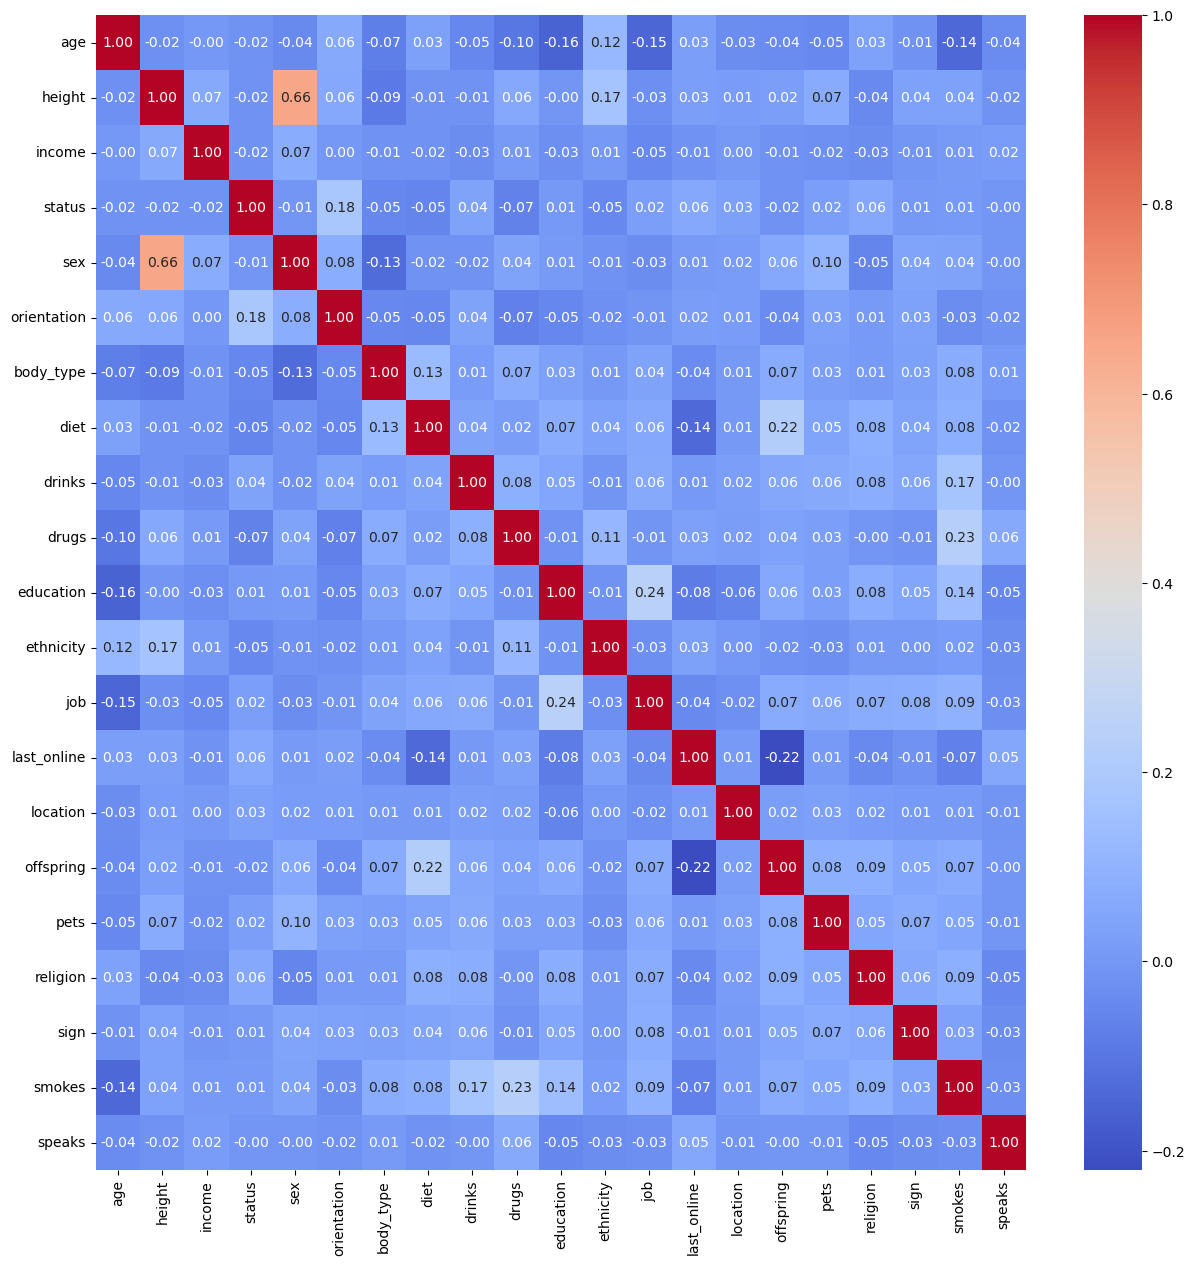

In [ ]:
corr_2 = og_fmt.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_2, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

##### 9. Dealing with NAs in dataset

Text(0.5, 1.0, 'Missing Value Matrix')

<Figure size 1800x1500 with 0 Axes>

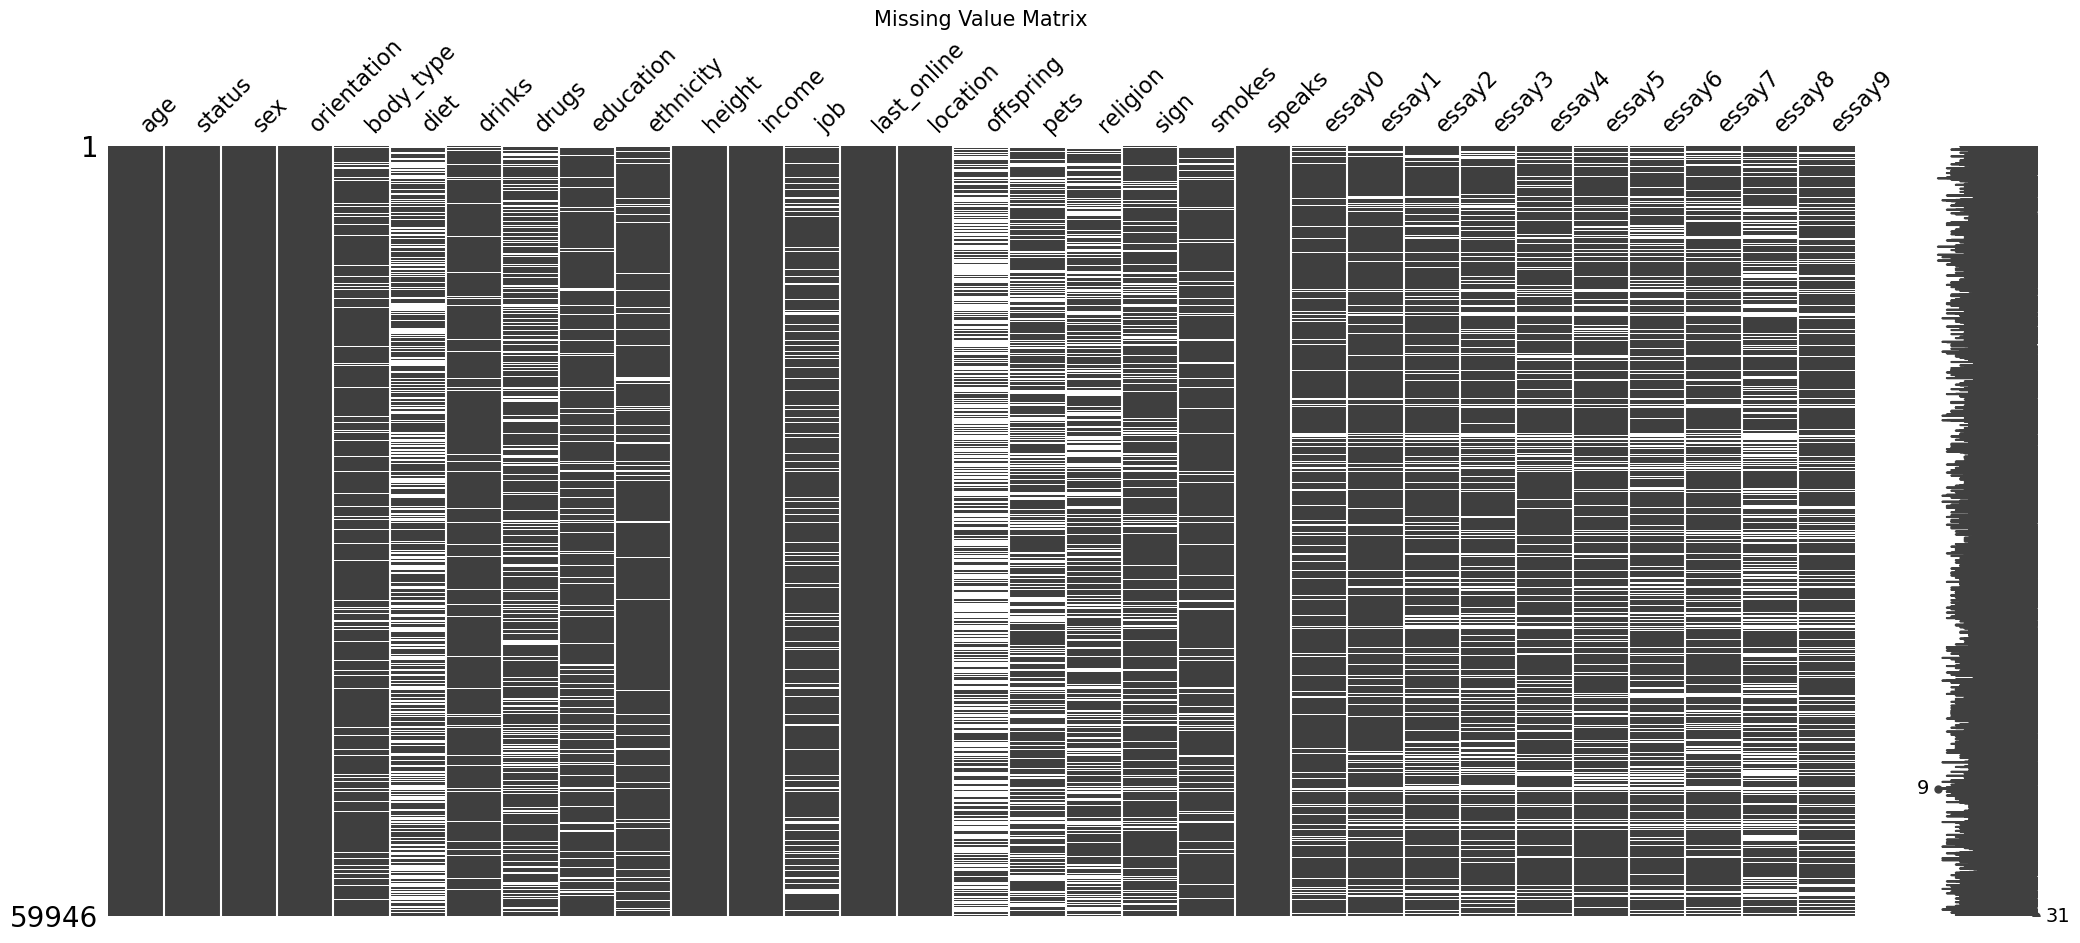

In [ ]:
import missingno as msno  # library for visualizing missing data patterns

plt.figure(figsize=(18, 15))
msno.matrix(okcupid)
plt.title('Missing Value Matrix', fontsize=15)

<Axes: >

<Figure size 1400x1200 with 0 Axes>

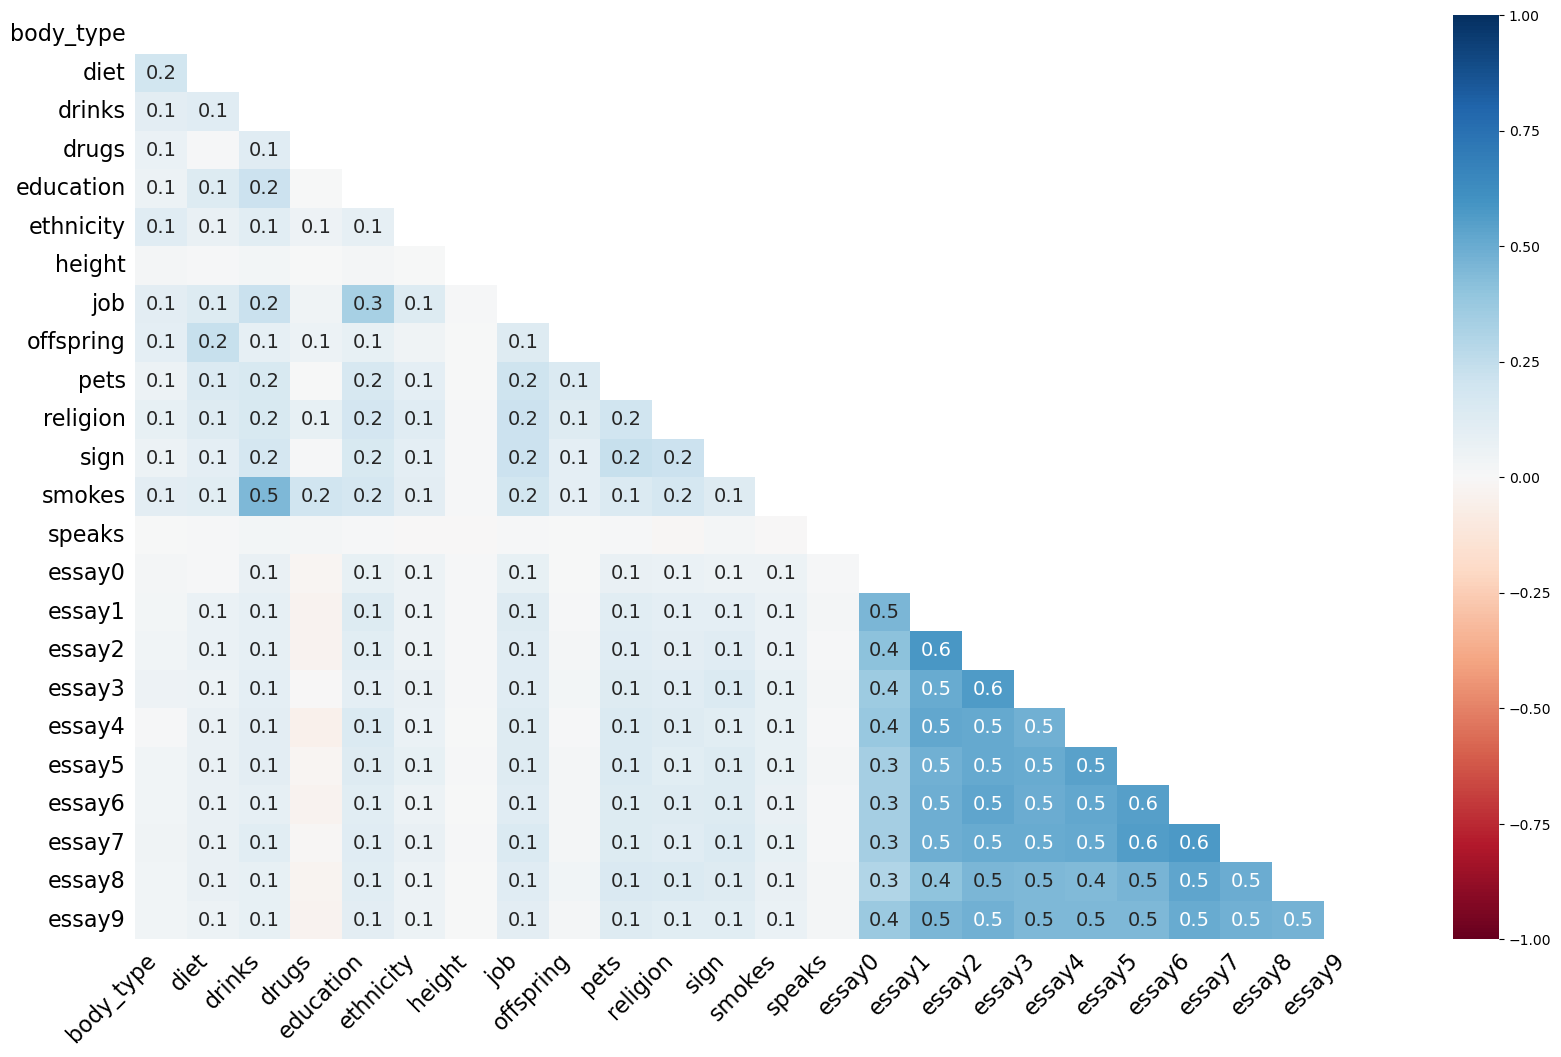

In [5]:
plt.figure(figsize=(14, 12))
msno.heatmap(okcupid)

In [6]:
missing_values = okcupid.isnull().sum()
missing_percent = (okcupid.isnull().sum() / len(okcupid) * 100)
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent.round(2)
}).sort_values('Missing Count', ascending=False)
print(missing_df)

             Missing Count  Missing %
offspring            35561      59.32
diet                 24395      40.69
religion             20226      33.74
pets                 19921      33.23
essay8               19225      32.07
drugs                14080      23.49
essay6               13771      22.97
essay9               12603      21.02
essay7               12451      20.77
essay3               11476      19.14
sign                 11056      18.44
essay5               10850      18.10
essay4               10537      17.58
essay2                9638      16.08
job                   8198      13.68
essay1                7572      12.63
education             6628      11.06
ethnicity             5680       9.48
smokes                5512       9.19
essay0                5488       9.15
body_type             5296       8.83
drinks                2985       4.98
speaks                  50       0.08
height                   3       0.01
status                   0       0.00
location    

<Axes: >

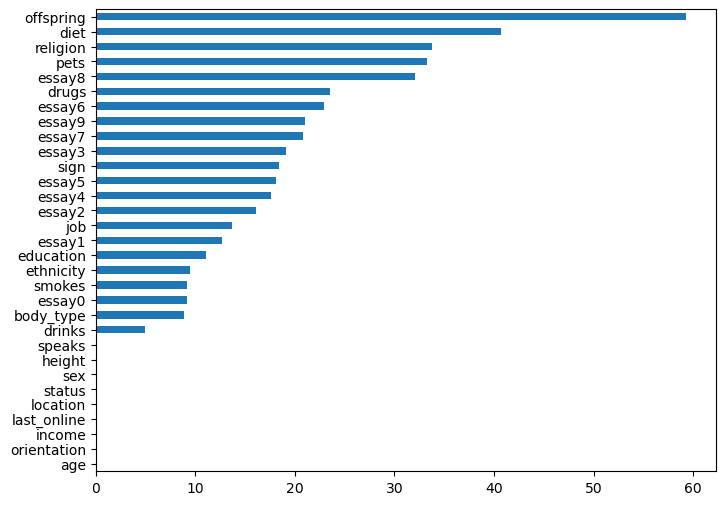

In [7]:
plt.figure(figsize=(8, 6))
missing_df['Missing %'].sort_values(ascending=True).plot(kind='barh')

In [8]:
# Create binary columns indicating missingness for key variables
missingness = okcupid.copy()

for var in missingness.columns:
    missingness[f'{var}_is_missing'] = missingness[var].isna().astype(int)
missingness.head()

age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic                NaN   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially        NaN     graduated from masters program   
3  socially        NaN      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  ...  essay0_is_missing  essay1_is_missing  \
0         asian, white  ...                  0                  0   
1                white  ...                  0                  0   
2                  NaN  ...                  0                  0   
3                white  ...                  0                  0   
4  asian, black, other  ...                  0                  0   

  essay2_is_missing essay3_is_missing essay4_is_missing essay5_is_missing  \
0                 0                 0                 0                 0   
1                 0                 1                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

  essay6_is_missing essay7_is_missing essay8_is_missing essay9_is_missing  
0                 0                 0                 0                 0  
1                 1                 1                 0                 1  
2                 1                 0                 0                 0  
3                 0                 1                 1                 0  
4                 1                 1                 1                 1  

[5 rows x 62 columns]

In [9]:
object_cols = okcupid.select_dtypes(include=['object'])
object_cols

numeric_cols = okcupid.select_dtypes(include=['float64', 'int64'])
numeric_cols

age  height  income
0       22    75.0      -1
1       35    70.0   80000
2       38    68.0      -1
3       23    71.0   20000
4       29    66.0      -1
...    ...     ...     ...
59941   59    62.0      -1
59942   24    72.0      -1
59943   42    71.0  100000
59944   27    73.0      -1
59945   39    68.0      -1

[59946 rows x 3 columns]

In [10]:
le = LabelEncoder()
for i in object_cols.columns:
    object_cols[i] = le.fit_transform(object_cols[i])

In [11]:
lencoded = pd.concat([numeric_cols, object_cols])
lencoded.head()

age  height   income  status  sex  orientation  body_type  diet  drinks  \
0  22.0    75.0     -1.0     NaN  NaN          NaN        NaN   NaN     NaN   
1  35.0    70.0  80000.0     NaN  NaN          NaN        NaN   NaN     NaN   
2  38.0    68.0     -1.0     NaN  NaN          NaN        NaN   NaN     NaN   
3  23.0    71.0  20000.0     NaN  NaN          NaN        NaN   NaN     NaN   
4  29.0    66.0     -1.0     NaN  NaN          NaN        NaN   NaN     NaN   

   drugs  ...  essay0  essay1  essay2  essay3  essay4  essay5  essay6  essay7  \
0    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   essay8  essay9  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

[5 rows x 31 columns]

In [12]:
# Initialize the MCARTest class with the "little" method
mcar_test = MCARTest(method='little')
p_value = mcar_test.little_mcar_test(lencoded)

print(p_value)

0.80756606231086


In [13]:
for col in object_cols:
    okcupid[col] = okcupid[col].fillna('unknown')

okcupid.isna().sum()

age            0
status         0
sex            0
orientation    0
body_type      0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         3
income         0
job            0
last_online    0
location       0
offspring      0
pets           0
religion       0
sign           0
smokes         0
speaks         0
essay0         0
essay1         0
essay2         0
essay3         0
essay4         0
essay5         0
essay6         0
essay7         0
essay8         0
essay9         0
dtype: int64

In [14]:
okcupid['height'] = okcupid['height'].fillna(okcupid['height'].mean())
okcupid.isna().sum()

age            0
status         0
sex            0
orientation    0
body_type      0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
offspring      0
pets           0
religion       0
sign           0
smokes         0
speaks         0
essay0         0
essay1         0
essay2         0
essay3         0
essay4         0
essay5         0
essay6         0
essay7         0
essay8         0
essay9         0
dtype: int64

In [15]:
okcupid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    59946 non-null  object 
 5   diet         59946 non-null  object 
 6   drinks       59946 non-null  object 
 7   drugs        59946 non-null  object 
 8   education    59946 non-null  object 
 9   ethnicity    59946 non-null  object 
 10  height       59946 non-null  float64
 11  income       59946 non-null  int64  
 12  job          59946 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    59946 non-null  object 
 16  pets         59946 non-null  object 
 17  religion     59946 non-null  object 
 18  sign         59946 non-null  object 
 19  smok

In [16]:
okcupid.shape

(59946, 31)

In [17]:
okcupid.iloc[:, :-17].describe(include='all')

age  status    sex orientation body_type     diet    drinks  \
count   59946.000000   59946  59946       59946     59946    59946     59946   
unique           NaN       5      2           3        13       19         7   
top              NaN  single      m    straight   average  unknown  socially   
freq             NaN   55697  35829       51606     14652    24395     41780   
mean       32.340290     NaN    NaN         NaN       NaN      NaN       NaN   
std         9.452779     NaN    NaN         NaN       NaN      NaN       NaN   
min        18.000000     NaN    NaN         NaN       NaN      NaN       NaN   
25%        26.000000     NaN    NaN         NaN       NaN      NaN       NaN   
50%        30.000000     NaN    NaN         NaN       NaN      NaN       NaN   
75%        37.000000     NaN    NaN         NaN       NaN      NaN       NaN   
max       110.000000     NaN    NaN         NaN       NaN      NaN       NaN   

        drugs                          education ethnicity        height  \
count   59946                              59946     59946  59946.000000   
unique      4                                 33       218           NaN   
top     never  graduated from college/university     white           NaN   
freq    37724                              23959     32831           NaN   
mean      NaN                                NaN       NaN     68.295281   
std       NaN                                NaN       NaN      3.994703   
min       NaN                                NaN       NaN      1.000000   
25%       NaN                                NaN       NaN     66.000000   
50%       NaN                                NaN       NaN     68.000000   
75%       NaN                                NaN       NaN     71.000000   
max       NaN                                NaN       NaN     95.000000   

                income      job       last_online  
count     59946.000000    59946             59946  
unique             NaN       22             30123  
top                NaN  unknown  2012-06-29-22-56  
freq               NaN     8198                24  
mean      20033.222534      NaN               NaN  
std       97346.192104      NaN               NaN  
min          -1.000000      NaN               NaN  
25%          -1.000000      NaN               NaN  
50%          -1.000000      NaN               NaN  
75%          -1.000000      NaN               NaN  
max     1000000.000000      NaN               NaN

In [18]:
okcupid.iloc[:, 14:].describe(include='all')

location offspring     pets religion     sign smokes  \
count                       59946     59946    59946    59946    59946  59946   
unique                        199        16       16       46       49      6   
top     san francisco, california   unknown  unknown  unknown  unknown     no   
freq                        31064     35561    19921    20226    11056  43896   

         speaks   essay0   essay1   essay2   essay3   essay4   essay5  \
count     59946    59946    59946    59946    59946    59946    59946   
unique     7648    54348    51517    48626    43521    49258    48962   
top     english  unknown  unknown  unknown  unknown  unknown  unknown   
freq      21828     5488     7572     9638    11476    10537    10850   

         essay6   essay7   essay8   essay9  
count     59946    59946    59946    59946  
unique    43584    45548    39324    45441  
top     unknown  unknown  unknown  unknown  
freq      13771    12452    19225    12603

##### 10. Dealing with 'speaks'

In [19]:
# okcupid['speaks'].nunique()
okcupid['speaks'].value_counts()

speaks
english                                                                21828
english (fluently)                                                      6628
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: count, Length: 7648, dtype: int64

In [20]:
def extract_languages(text):
    if pd.isna(text):
        return []
    # Extract just the language names, not proficiency
    languages = []
    for part in str(text).split(','):
        # Extract the language name before any parentheses
        lang = part.strip().split(' (')[0].strip().lower()
        languages.append(lang)
    return languages

In [21]:
okcupid['languages'] = okcupid['speaks'].apply(extract_languages)
okcupid['languages'].value_counts()

languages
[english]                                        29072
[english, spanish]                                7831
[english, french]                                 2291
[english, chinese]                                1726
[english, german]                                  747
                                                 ...  
[english, spanish, korean, swahili]                  1
[english, italian, spanish, german, japanese]        1
[english, ancient greek, latin, lisp]                1
[english, arabic, french, hebrew, spanish]           1
[english, french, japanese, latin]                   1
Name: count, Length: 3967, dtype: int64

In [22]:
mlb = MultiLabelBinarizer()
lang_encoded = mlb.fit_transform(okcupid['languages'])
lang_df = pd.DataFrame(lang_encoded, 
                           columns=mlb.classes_,
                           index=okcupid.index)
lang_df.shape

(59946, 78)

In [23]:
lang_df.columns

Index(['afrikaans', 'albanian', 'ancient greek', 'arabic', 'armenian',
       'basque', 'belarusan', 'bengali', 'breton', 'bulgarian', 'c++',
       'catalan', 'cebuano', 'chechen', 'chinese', 'croatian', 'czech',
       'danish', 'dutch', 'english', 'esperanto', 'estonian', 'farsi',
       'finnish', 'french', 'frisian', 'georgian', 'german', 'greek',
       'gujarati', 'hawaiian', 'hebrew', 'hindi', 'hungarian', 'icelandic',
       'ilongo', 'indonesian', 'irish', 'italian', 'japanese', 'khmer',
       'korean', 'latin', 'latvian', 'lisp', 'lithuanian', 'malay', 'maori',
       'mongolian', 'norwegian', 'occitan', 'other', 'persian', 'polish',
       'portuguese', 'romanian', 'rotuman', 'russian', 'sanskrit', 'sardinian',
       'serbian', 'sign language', 'slovak', 'slovenian', 'spanish', 'swahili',
       'swedish', 'tagalog', 'tamil', 'thai', 'tibetan', 'turkish',
       'ukrainian', 'unknown', 'urdu', 'vietnamese', 'welsh', 'yiddish'],
      dtype='object')

In [24]:
lang_df.sum().sort_values(ascending=False)

english      59896
spanish      16312
french        7851
chinese       3660
german        3083
             ...  
rotuman         12
armenian        11
breton           9
slovenian        8
sardinian        1
Length: 78, dtype: int64

In [25]:
def extract_with_proficiency(text):
    if pd.isna(text):
        return {}
    result = {}
    for part in str(text).split(','):
        part = part.strip()
        if '(' in part and ')' in part:
            lang, level = part.split(' (')
            level = level.replace(')', '').strip()
            result[lang.strip().lower()] = level
        else:
            result[part.lower()] = 'mentioned'  # Default when no level is specified
    return result

In [26]:
okcupid['lang_profc'] = okcupid['speaks'].apply(extract_with_proficiency)
okcupid['lang_profc'].value_counts()

lang_profc
{'english': 'mentioned'}                                                                                        21945
{'english': 'fluently'}                                                                                          6690
{'english': 'fluently', 'spanish': 'poorly'}                                                                     2073
{'english': 'fluently', 'spanish': 'okay'}                                                                       1928
{'english': 'fluently', 'spanish': 'fluently'}                                                                   1292
                                                                                                                ...  
{'english': 'fluently', 'german': 'fluently', 'russian': 'poorly', 'spanish': 'poorly', 'french': 'poorly'}         1
{'english': 'fluently', 'tagalog': 'fluently', 'other': 'fluently', 'russian': 'poorly', 'french': 'poorly'}        1
{'english': 'mentioned', 'french': 'fluently'

In [27]:
top_languages = ['english', 'spanish', 'french', 'chinese', 'german']  # Determine from your data
proficiency_levels = ['fluently', 'okay', 'poorly']

## Binarises only top langs+profc combos.
for lang in top_languages:
    for level in proficiency_levels:
        column_name = f'speaks_{lang}_{level}'
        okcupid[column_name] = okcupid['lang_profc'].apply(
            lambda x: 1 if lang in x and x[lang] == level else 0
        )
okcupid.head()

age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic            unknown   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially    unknown     graduated from masters program   
3  socially    unknown      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  ...  speaks_spanish_poorly  speaks_french_fluently  \
0         asian, white  ...                      0                       0   
1                white  ...                      1                       0   
2              unknown  ...                      0                       0   
3                white  ...                      0                       0   
4  asian, black, other  ...                      0                       0   

  speaks_french_okay speaks_french_poorly speaks_chinese_fluently  \
0                  0                    0                       0   
1                  0                    1                       0   
2                  0                    0                       0   
3                  0                    0                       0   
4                  0                    0                       0   

  speaks_chinese_okay speaks_chinese_poorly speaks_german_fluently  \
0                   0                     0                      0   
1                   0                     0                      0   
2                   0                     0                      0   
3                   0                     0                      0   
4                   0                     0                      0   

  speaks_german_okay speaks_german_poorly  
0                  0                    0  
1                  0                    0  
2                  0                    0  
3                  0                    1  
4                  0                    0  

[5 rows x 48 columns]

In [28]:
# Count number of languages spoken
okcupid['lang_count'] = okcupid['languages'].apply(len)

# Count languages at different proficiency levels
okcupid['fluent_langs'] = okcupid['lang_profc'].apply(
    lambda x: sum(1 for level in x.values() if level == 'fluently')
)
okcupid.head()

age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic            unknown   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially    unknown     graduated from masters program   
3  socially    unknown      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  ...  speaks_french_okay  speaks_french_poorly  \
0         asian, white  ...                   0                     0   
1                white  ...                   0                     1   
2              unknown  ...                   0                     0   
3                white  ...                   0                     0   
4  asian, black, other  ...                   0                     0   

  speaks_chinese_fluently speaks_chinese_okay speaks_chinese_poorly  \
0                       0                   0                     0   
1                       0                   0                     0   
2                       0                   0                     0   
3                       0                   0                     0   
4                       0                   0                     0   

  speaks_german_fluently speaks_german_okay speaks_german_poorly lang_count  \
0                      0                  0                    0          1   
1                      0                  0                    0          3   
2                      0                  0                    0          3   
3                      0                  0                    1          2   
4                      0                  0                    0          1   

  fluent_langs  
0            0  
1            1  
2            0  
3            0  
4            0  

[5 rows x 50 columns]

In [29]:
okcupid.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'languages',
       'lang_profc', 'speaks_english_fluently', 'speaks_english_okay',
       'speaks_english_poorly', 'speaks_spanish_fluently',
       'speaks_spanish_okay', 'speaks_spanish_poorly',
       'speaks_french_fluently', 'speaks_french_okay', 'speaks_french_poorly',
       'speaks_chinese_fluently', 'speaks_chinese_okay',
       'speaks_chinese_poorly', 'speaks_german_fluently', 'speaks_german_okay',
       'speaks_german_poorly', 'lang_count', 'fluent_langs'],
      dtype='object')

In [33]:
okcupid['income'].value_counts().sort_values()

income
 500000        48
 250000       149
 1000000      521
 150000       631
 70000        707
 60000        736
 50000        975
 40000       1005
 30000       1048
 80000       1111
 100000      1621
 20000       2952
-1          48442
Name: count, dtype: int64